In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [237]:
bike = pd.read_csv('metro-bike-share-trip-data.csv')
bike.head()

/Users/holden/Anaconda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [238]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 16 columns):
Trip ID                       132427 non-null int64
Duration                      132427 non-null int64
Start Time                    132427 non-null object
End Time                      132427 non-null object
Starting Station ID           132408 non-null float64
Starting Station Latitude     132379 non-null float64
Starting Station Longitude    132379 non-null float64
Ending Station ID             132331 non-null float64
Ending Station Latitude       131376 non-null float64
Ending Station Longitude      131376 non-null float64
Bike ID                       132417 non-null float64
Plan Duration                 131661 non-null float64
Trip Route Category           132427 non-null object
Passholder Type               132427 non-null object
Starting Lat-Long             98622 non-null object
Ending Lat-Long               131376 non-null object
dtypes: float64(8), int64(2), object

In [239]:
bike.describe()

,Trip ID,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration
count,1.324270e+05,132427.000000,132408.000000,132379.000000,132379.000000,132331.00000,131376.000000,131376.000000,132417.000000,131661.000000
mean,1.153001e+07,1555.301562,3043.020754,34.039309,-118.221534,3042.38672,34.034614,-118.206642,6193.618878,44.821967
std,6.369462e+06,5814.241813,37.742021,0.529336,1.838335,43.08440,0.650706,2.259913,293.606755,90.411579
min,1.912818e+06,60.000000,3000.000000,0.000000,-118.472832,3000.00000,0.000000,-118.472832,1349.000000,0.000000
25%,5.060814e+06,360.000000,3024.000000,34.044170,-118.256980,3022.00000,34.044159,-118.256981,5953.000000,0.000000
50%,1.043827e+07,600.000000,3040.000000,34.046822,-118.250954,3038.00000,34.046810,-118.250954,6186.000000,30.000000
75%,1.720633e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.00000,34.050480,-118.238810,6434.000000,30.000000
max,2.379422e+07,86400.000000,4108.000000,34.064281,0.000000,4108.00000,34.064281,0.000000,6728.000000,365.000000


In [240]:
bike_na = (bike.isnull().sum() * 100)/len(bike)

In [241]:
bike_na.sort_values(ascending=False)

Starting Lat-Long             25.527272
Ending Lat-Long                0.793645
Ending Station Longitude       0.793645
Ending Station Latitude        0.793645
Plan Duration                  0.578432
Ending Station ID              0.072493
Starting Station Longitude     0.036246
Starting Station Latitude      0.036246
Starting Station ID            0.014348
Bike ID                        0.007551
Passholder Type                0.000000
Trip Route Category            0.000000
End Time                       0.000000
Start Time                     0.000000
Duration                       0.000000
Trip ID                        0.000000
dtype: float64

In [242]:
bike = bike.dropna()

In [243]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 0 to 98640
Data columns (total 16 columns):
Trip ID                       97825 non-null int64
Duration                      97825 non-null int64
Start Time                    97825 non-null object
End Time                      97825 non-null object
Starting Station ID           97825 non-null float64
Starting Station Latitude     97825 non-null float64
Starting Station Longitude    97825 non-null float64
Ending Station ID             97825 non-null float64
Ending Station Latitude       97825 non-null float64
Ending Station Longitude      97825 non-null float64
Bike ID                       97825 non-null float64
Plan Duration                 97825 non-null float64
Trip Route Category           97825 non-null object
Passholder Type               97825 non-null object
Starting Lat-Long             97825 non-null object
Ending Lat-Long               97825 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage:

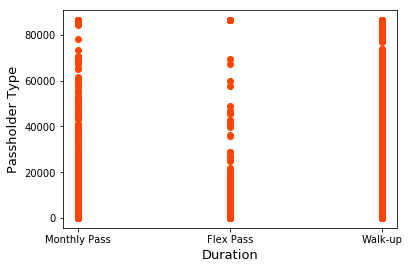

In [276]:
fig, ax = plt.subplots()
ax.scatter(bike['Passholder Type'],bike['Duration'],color='orangered')
plt.xlabel('Duration',fontsize=13)
plt.ylabel('Passholder Type',fontsize=13)
plt.show()

# Distance Calculation

In [245]:
from math import radians, cos, sin, asin, sqrt

In [246]:
def distance(lon1,lat1,lon2,lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1,lat1,lon2,lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r * 1000

In [247]:
bike.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [248]:
l = []
for i in range(bike.shape[0]):
    l.append(distance(bike['Starting Station Longitude'].iloc[i],
            bike['Starting Station Latitude'].iloc[i],
            bike['Ending Station Longitude'].iloc[i],
            bike['Ending Station Latitude'].iloc[i]))

In [249]:
bike['distance'] = l

In [250]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 0 to 98640
Data columns (total 17 columns):
Trip ID                       97825 non-null int64
Duration                      97825 non-null int64
Start Time                    97825 non-null object
End Time                      97825 non-null object
Starting Station ID           97825 non-null float64
Starting Station Latitude     97825 non-null float64
Starting Station Longitude    97825 non-null float64
Ending Station ID             97825 non-null float64
Ending Station Latitude       97825 non-null float64
Ending Station Longitude      97825 non-null float64
Bike ID                       97825 non-null float64
Plan Duration                 97825 non-null float64
Trip Route Category           97825 non-null object
Passholder Type               97825 non-null object
Starting Lat-Long             97825 non-null object
Ending Lat-Long               97825 non-null object
distance                      97825 non-null float64


In [251]:
train = pd.DataFrame(data=[bike['Duration'],bike['Starting Station Latitude'],bike['Starting Station Longitude'],bike['Ending Station Latitude'],
            bike['Ending Station Longitude'],bike['Trip Route Category'],bike['Passholder Type'],bike['distance']],index=['Duration','Starting Station Latitude','Starting Station Longitude','Ending Station Latitude',
            'Ending Station Longitude','Trip Route Category','Passholder Type','Distance'])

In [252]:
train = train.T

In [253]:
train.head()

,Duration,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude,Trip Route Category,Passholder Type,Distance
0,180,34.0566,-118.237,34.0566,-118.237,Round Trip,Monthly Pass,0
1,1980,34.0566,-118.237,34.0566,-118.237,Round Trip,Monthly Pass,0
2,300,34.0529,-118.242,34.0529,-118.242,Round Trip,Flex Pass,0
3,10860,34.0529,-118.242,34.0529,-118.242,Round Trip,Flex Pass,0
4,420,34.0499,-118.256,34.0499,-118.256,Round Trip,Walk-up,0


In [254]:
Trip_Route_Category = pd.get_dummies(train['Trip Route Category'],prefix='Trip Route Category')
Passholder_Type = pd.get_dummies(train['Passholder Type'],prefix='Passholder Type')

In [255]:
train = pd.concat([train,Trip_Route_Category,Passholder_Type],axis=1)

In [256]:
train = train.drop(['Trip Route Category','Passholder Type'],axis=1)

In [257]:
train[['Duration','Starting Station Latitude','Starting Station Longitude','Ending Station Latitude',
            'Ending Station Longitude','Distance']] = train[['Duration','Starting Station Latitude','Starting Station Longitude','Ending Station Latitude',
            'Ending Station Longitude','Distance']].apply(pd.to_numeric)

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 0 to 98640
Data columns (total 11 columns):
Duration                          97825 non-null int64
Starting Station Latitude         97825 non-null float64
Starting Station Longitude        97825 non-null float64
Ending Station Latitude           97825 non-null float64
Ending Station Longitude          97825 non-null float64
Distance                          97825 non-null float64
Trip Route Category_One Way       97825 non-null uint8
Trip Route Category_Round Trip    97825 non-null uint8
Passholder Type_Flex Pass         97825 non-null uint8
Passholder Type_Monthly Pass      97825 non-null uint8
Passholder Type_Walk-up           97825 non-null uint8
dtypes: float64(5), int64(1), uint8(5)
memory usage: 8.2 MB


In [259]:
bike['Passholder Type'].value_counts()

Monthly Pass    60093
Walk-up         30532
Flex Pass        7200
Name: Passholder Type, dtype: int64

In [275]:
train.head(10)

,Duration,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude,Distance,Trip Route Category_One Way,Trip Route Category_Round Trip,Passholder Type_Flex Pass,Passholder Type_Monthly Pass,Passholder Type_Walk-up
0,180,34.056610,-118.23721,34.056610,-118.23721,0.000000,0,1,0,1,0
1,1980,34.056610,-118.23721,34.056610,-118.23721,0.000000,0,1,0,1,0
2,300,34.052898,-118.24156,34.052898,-118.24156,0.000000,0,1,1,0,0
3,10860,34.052898,-118.24156,34.052898,-118.24156,0.000000,0,1,1,0,0
4,420,34.049889,-118.25588,34.049889,-118.25588,0.000000,0,1,0,0,1
5,780,34.045609,-118.23703,34.039219,-118.23649,712.231113,1,0,0,1,0
6,600,34.046070,-118.23309,34.056610,-118.23721,1231.927651,1,0,0,1,0
7,600,34.040600,-118.25384,34.048550,-118.25905,1005.915016,1,0,1,0,0
8,2880,34.044701,-118.25244,34.044701,-118.25244,0.000000,0,1,1,0,0
9,960,34.044701,-118.25244,34.064281,-118.23894,2507.468768,1,0,0,1,0


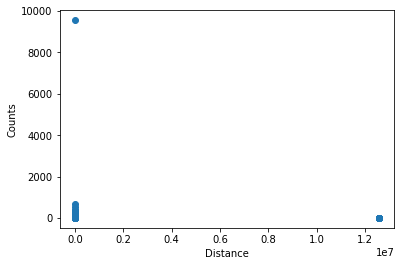

In [261]:
fig, ax = plt.subplots()
ax.scatter(train['Distance'].value_counts().index.values,train['Distance'].value_counts().values)
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.show()

# logistic regression -> predict 'Trip Route Category_One Way'

In [262]:
X1 = train.drop('Trip Route Category_One Way',axis=1)
y1 = train['Trip Route Category_One Way']

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)

In [264]:
alg = LogisticRegression()

In [265]:
alg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [266]:
prediction1 = alg.predict(X_test)

In [267]:
print(classification_report(y_test,prediction1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1863
          1       1.00      1.00      1.00     17702

avg / total       1.00      1.00      1.00     19565



In [268]:
print(confusion_matrix(y_test,prediction1))

[[ 1863     0]
 [    0 17702]]


# Decision Tree -> predict 'Passholder Type_Monthly Pass'

In [269]:
X2 = train.drop('Passholder Type_Monthly Pass',axis=1)
y2 = train['Passholder Type_Monthly Pass']
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.25)

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
alg = DecisionTreeClassifier()
alg.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [272]:
prediction2 = alg.predict(X_test)

In [273]:
print(classification_report(y_test,prediction2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      9349
          1       1.00      1.00      1.00     15108

avg / total       1.00      1.00      1.00     24457



In [274]:
print(confusion_matrix(y_test,prediction2))

[[ 9349     0]
 [    0 15108]]
